In [ ]:
# importing the libraries

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback, EarlyStopping

In [ ]:
# Loading and preprocessing the CIFAR-100 dataset
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()
num_classes = 100
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
len(train_labels)   # data in train_labels

50000

In [ ]:
test_images.shape

(10000, 32, 32, 3)

In [ ]:
len(test_labels)   # data in test_labels

10000

In [ ]:
# list of 100 class names

class_names = [
    'beaver', 'dolphin', 'otter', 'seal', 'whale',
    'aquarium_fish', 'flatfish', 'ray', 'shark', 'trout',

]


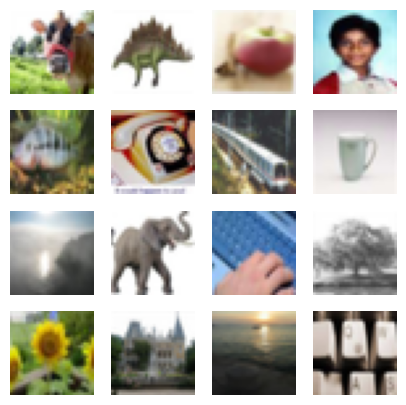

In [ ]:

plt.figure(figsize=(5, 5))

for i in range (4*4):
  plt.subplot(4, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.axis('off')



In [ ]:
# Building the model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='softmax')  # 100 classes in CIFAR-100
])

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2
)
datagen.fit(train_images)


In [ ]:
# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with data augmentation and early stopping
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    steps_per_epoch=len(train_images) // 64, epochs=600,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])


Epoch 1/600
781/781 [==============================] - 59s 53ms/step - loss: 4.2223 - accuracy: 0.0887 - val_loss: 3.6133 - val_accuracy: 0.1520
Epoch 2/600
781/781 [==============================] - 40s 52ms/step - loss: 3.4838 - accuracy: 0.1756 - val_loss: 3.5689 - val_accuracy: 0.2076
Epoch 3/600
781/781 [==============================] - 41s 52ms/step - loss: 3.0812 - accuracy: 0.2410 - val_loss: 2.8966 - val_accuracy: 0.2816
Epoch 4/600
781/781 [==============================] - 39s 50ms/step - loss: 2.8280 - accuracy: 0.2830 - val_loss: 2.5938 - val_accuracy: 0.3428
Epoch 5/600
781/781 [==============================] - 39s 50ms/step - loss: 2.6251 - accuracy: 0.3250 - val_loss: 2.3949 - val_accuracy: 0.3752
Epoch 6/600
781/781 [==============================] - 39s 50ms/step - loss: 2.4725 - accuracy: 0.3556 - val_loss: 2.4471 - val_accuracy: 0.3866
Epoch 7/600
781/781 [==============================] - 41s 52ms/step - loss: 2.3476 - accuracy: 0.3874 - val_loss: 2.0926 - val_ac

In [ ]:
model.summary() # summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                        

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 1.2803 - accuracy: 0.6872
Test accuracy: 0.6872000098228455


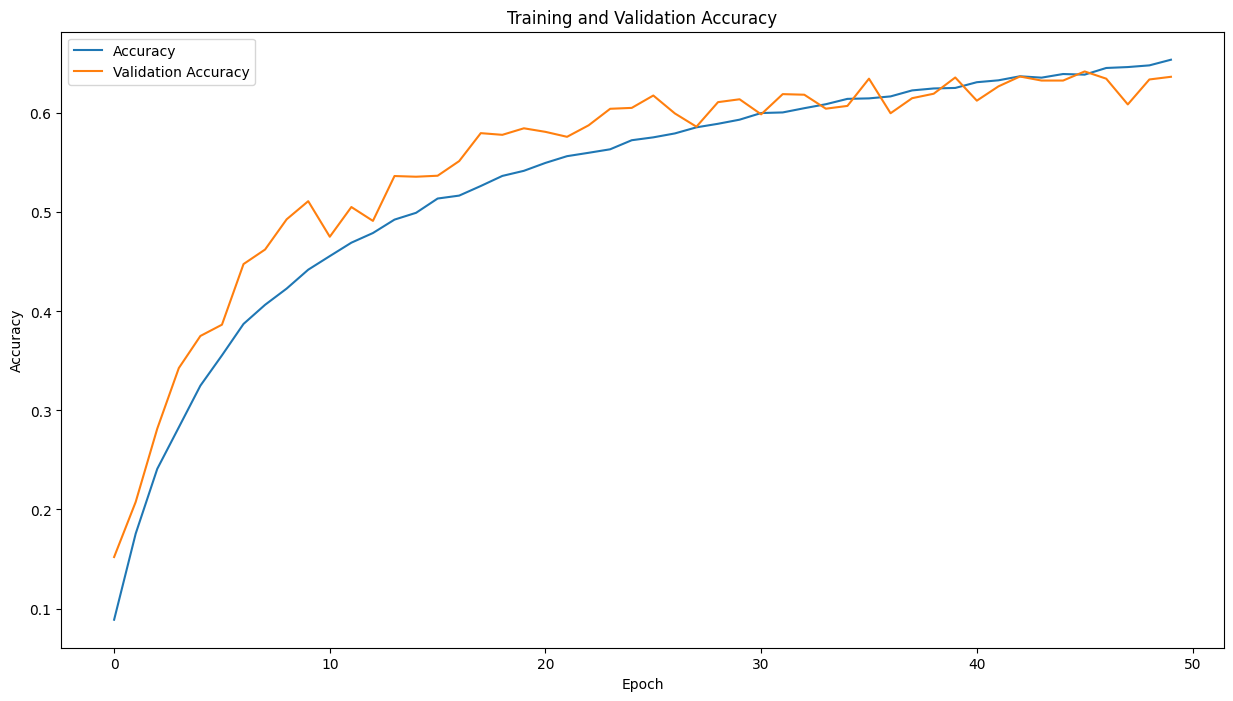

In [ ]:
# Plot training history of the model
plt.figure(figsize=(15, 8))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 1.2803 - accuracy: 0.6872


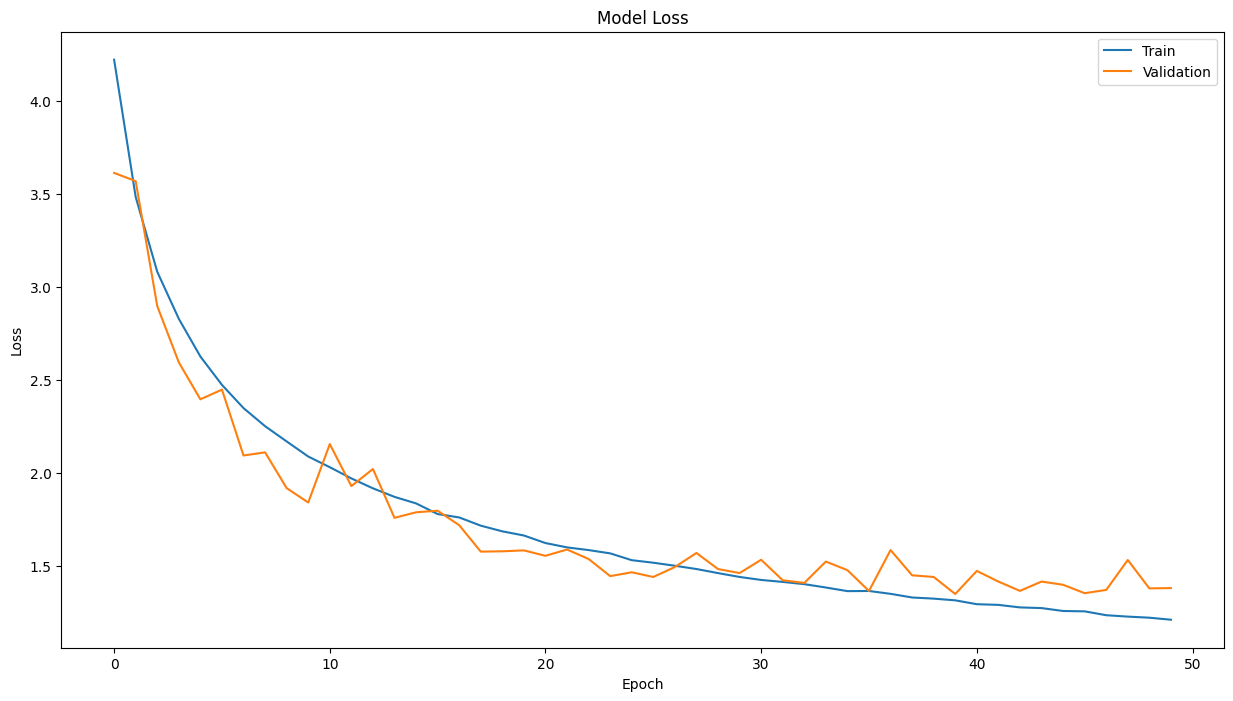

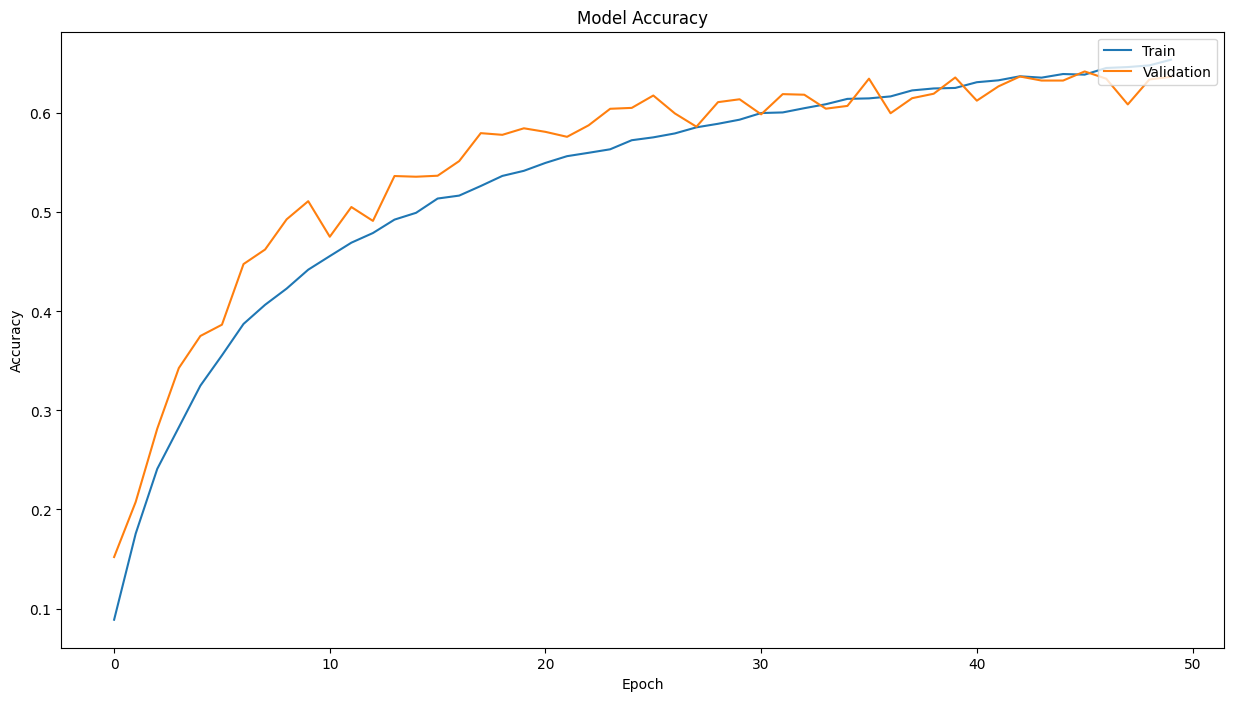

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values of the model
plt.figure(figsize=(15, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Ploting training & validating accuracy values model
plt.figure(figsize=(15, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()